In [1]:
from typing import TypedDict,List
from langgraph.graph import StateGraph

class AgentState(TypedDict):
    name:List
    age:str
    final:str

In [6]:
def first_node(state:AgentState)->AgentState:
    state["final"] = f"hi {state['name']} "
    return state

def second_node(state:AgentState)->AgentState:
    state["final"] += f" youre {state['age']}"
    return state

In [7]:
graph = StateGraph(AgentState)
graph.add_node("first",first_node)
graph.add_node("second",second_node)
graph.set_entry_point("first")
graph.add_edge("first","second")
graph.set_finish_point("second")
app = graph.compile()

In [8]:
res = app.invoke({"name":"Utsav","age":21})
res

{'name': 'Utsav', 'age': 21, 'final': 'hi Utsav  youre 21'}

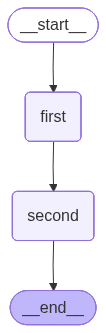

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))